# Sklearn

## sklearn.liner_model

**linear_model:**
* RidgeClassifier
* SGDClassifier
* SGDRegressor
* LinearRegression
* LogisticRegression
* Lasso
* etc

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

примеры: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

In [0]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [0]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация данных

In [0]:
blobs = datasets.make_blobs(centers = 2, cluster_std = 5.5, random_state=1)

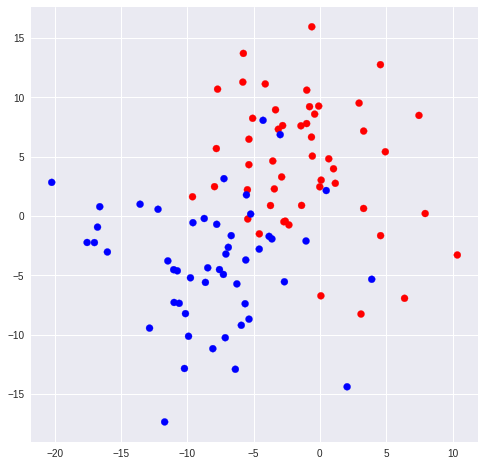

In [0]:
colors = ListedColormap(['red', 'blue'])

pylab.figure(figsize(8, 8))
pylab.scatter([x[0] for x in blobs[0]], [x[1] for x in blobs[0]], c=blobs[1], cmap=colors)

In [0]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(blobs[0], blobs[1], 
                                                                                    test_size = 0.3,
                                                                                    random_state = 1)

### Линейная классификация

#### RidgeClassifier

In [0]:
#создание объекта - классификатора
ridge_classifier = linear_model.RidgeClassifier(random_state = 1)

In [0]:
#обучение классификатора
ridge_classifier.fit(train_data, train_labels)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=1, solver='auto',
        tol=0.001)

In [0]:
#применение обученного классификатора
ridge_predictions = ridge_classifier.predict(test_data)

In [0]:
print test_labels

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


In [0]:
print ridge_predictions

[0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [0]:
#оценка качества классификации
metrics.accuracy_score(test_labels, ridge_predictions)

0.8666666666666667

In [0]:
ridge_classifier.coef_

array([[-0.0854443 , -0.07273219]])

In [0]:
ridge_classifier.intercept_ 

array([-0.31250723])

#### LogisticRegression

In [0]:
log_regressor = linear_model.LogisticRegression(random_state = 1)

In [0]:
log_regressor.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
lr_predictions = log_regressor.predict(test_data)

In [0]:
lr_proba_predictions = log_regressor.predict_proba(test_data)

In [0]:
print test_labels

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


In [0]:
print lr_predictions

[0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [0]:
print lr_proba_predictions

[[0.99873457 0.00126543]
 [0.38956803 0.61043197]
 [0.45000737 0.54999263]
 [0.00536816 0.99463184]
 [0.70965944 0.29034056]
 [0.23304944 0.76695056]
 [0.98983143 0.01016857]
 [0.9709671  0.0290329 ]
 [0.93909394 0.06090606]
 [0.15103335 0.84896665]
 [0.90324667 0.09675333]
 [0.0100448  0.9899552 ]
 [0.82338574 0.17661426]
 [0.05238427 0.94761573]
 [0.00443451 0.99556549]
 [0.00102911 0.99897089]
 [0.20817393 0.79182607]
 [0.91074564 0.08925436]
 [0.22580526 0.77419474]
 [0.00101709 0.99898291]
 [0.09600944 0.90399056]
 [0.99367624 0.00632376]
 [0.9779897  0.0220103 ]
 [0.29889823 0.70110177]
 [0.00210487 0.99789513]
 [0.00929423 0.99070577]
 [0.2670277  0.7329723 ]
 [0.85210662 0.14789338]
 [0.98871444 0.01128556]
 [0.00407572 0.99592428]]


In [0]:
print metrics.accuracy_score(test_labels, lr_predictions)

0.8


In [0]:
print metrics.accuracy_score(test_labels, ridge_predictions)

0.8666666666666667


### Оценка качества по cross-validation

#### cross_val_score

In [0]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

In [0]:
lr_scoring = model_selection.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

In [0]:
lr_scoring

array([0.7, 0.9, 0.9, 0.9, 1. , 1. , 0.7, 0.9, 0.9, 0.8])

In [0]:
print 'Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std())

Ridge mean:0.88, max:1.0, min:0.7, std:0.0871779788708


In [0]:
print 'Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std())

Log mean:0.87, max:1.0, min:0.7, std:0.100498756211


#### cross_val_score с заданными scorer и cv_strategy

In [0]:
scorer = metrics.make_scorer(metrics.accuracy_score)

In [0]:
cv_strategy = model_selection.StratifiedShuffleSplit(blobs[1], test_size = 0.3, random_state = 2)

In [0]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = scorer, )

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [0]:
lr_scoring = model_selection.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = scorer, )

In [0]:
print 'Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std())

Ridge mean:0.86887254902, max:0.911764705882, min:0.8125, std:0.041630607234


In [0]:
print 'Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std())

Log mean:0.84987745098, max:0.911764705882, min:0.794117647059, std:0.0482242460048
